## Pumpkin-seed-classification-eda

## **Imports**

In [12]:
# Common
import numpy as np
import pandas as pd

# Data 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px
from scipy import signal
import scipy
#to supress warning
import warnings
warnings.filterwarnings('ignore')

#to make shell more intractive
from IPython.display import display

# setting up the chart size and background
plt.rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')

# Model 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential, load_model
from keras.layers import Dense, BatchNormalization, Dropout

# Callbacks 
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Metrics
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix

# **Data Loading**

In [5]:
pwd

'E:\\DataScience\\MachineLearning\\Pumpkin Seed Classification'

In [7]:
path ='E:\\DataScience\\MachineLearning\\Pumpkin Seed Classification'

In [56]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Dataset',
 'Pre-trained-Model',
 'Pumpkin-seed-analysis.ipynb']

In [9]:
dataset =path+'\\Dataset'
os.listdir(dataset)

['Pumpkin_Seeds_Dataset.arff',
 'Pumpkin_Seeds_Dataset.xlsx',
 'Pumpkin_Seeds_Dataset_Citation_Request.txt']

In [58]:
pretrained_model =path+'\\Pre-trained-Model'
os.listdir(pretrained_model)

['Dense-01-V1.h5', 'Dense-01-V2.h5', 'Dense-02.h5', 'Dense-03.h5']

In [16]:
# Specify the File Path
file_path = dataset+'\\Pumpkin_Seeds_Dataset.xlsx'

# Load File 
df = pd.read_excel(file_path)

# A quick view
df.head(10).style.background_gradient(cmap = 'rocket_r')

# **Data Info**

In [17]:
size = len(df)
columns = df.columns
n_columns = len(columns)
class_names = df['Class']

print("Total Number of Columns : {}".format(n_columns))
print("Total Number of Rows    : {}".format(size))

Total Number of Columns : 13
Total Number of Rows    : 2500


In [18]:
# Calculate Values
names = df['Class'].value_counts().index
values = df['Class'].value_counts()

# Plotting
fig = px.pie(names=names, values=values, title="Class Distribution", width=600)
fig.update_layout({'title':{'x':0.5}})
fig.show()

**Greet!!**, the **classes** are **almost equally distributed**. This ensures that are **model cannot be biased towards any class**.

# **Data Visulaization**

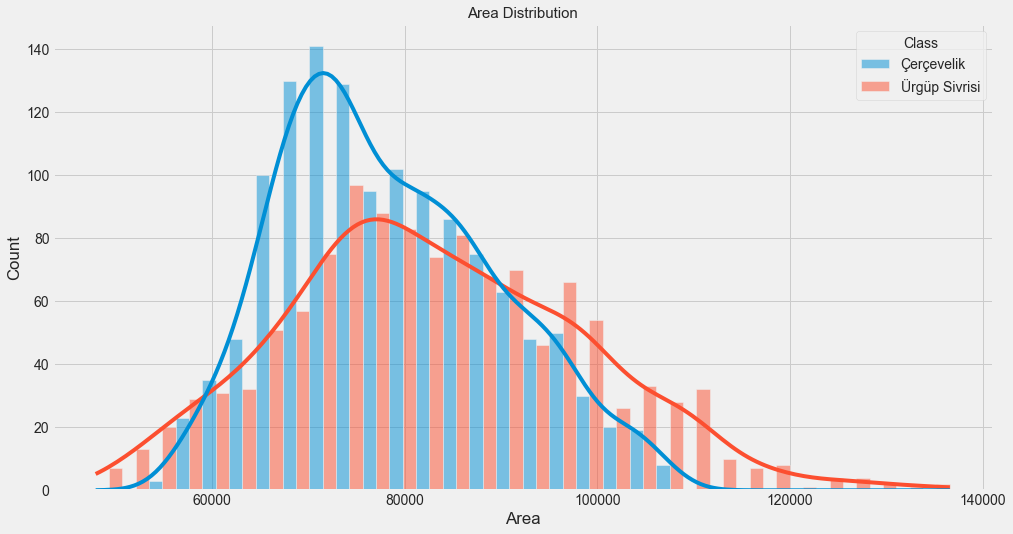

In [19]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Area', kde=True, hue='Class', multiple='dodge')
plt.title("Area Distribution", fontsize=15)
plt.show()

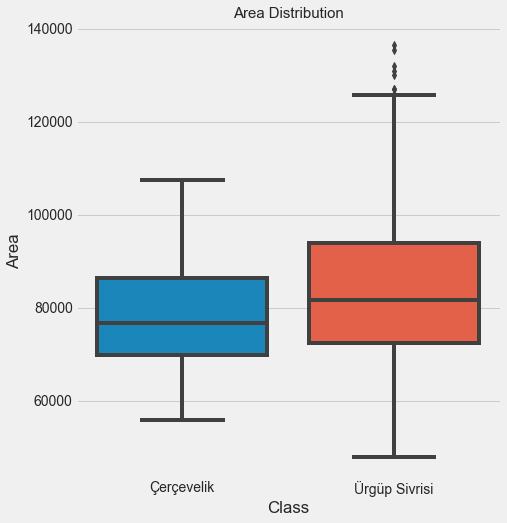

In [20]:
# plt.figure(figsize=(15,8))
sns.catplot(data=df, y='Area', x='Class', kind='box', aspect=1, height=7)
plt.title("Area Distribution", fontsize=15)
plt.show()

$Observations :$
* If you notice carefully then the **KDE** shows us that the **peak of both distributions is not at the same point**. This shows are **separation** between both **classes** in terms of **Area**. In general we can say that : 

 * **Higher values** of area belongs to the class **Ürgüp Sivrisi**
 * **Lower values** of area belongs to the class **Çerçevelik**

* The **Box plot** confirms that there is a **minor separation between both classes**. And the **Çerçevelik** class is **concentrated** towards the **lower values** of **Area** whereas **Ürgüp Sivrisi** class is **concentrated** towards the **higher values** of **Area**.


---

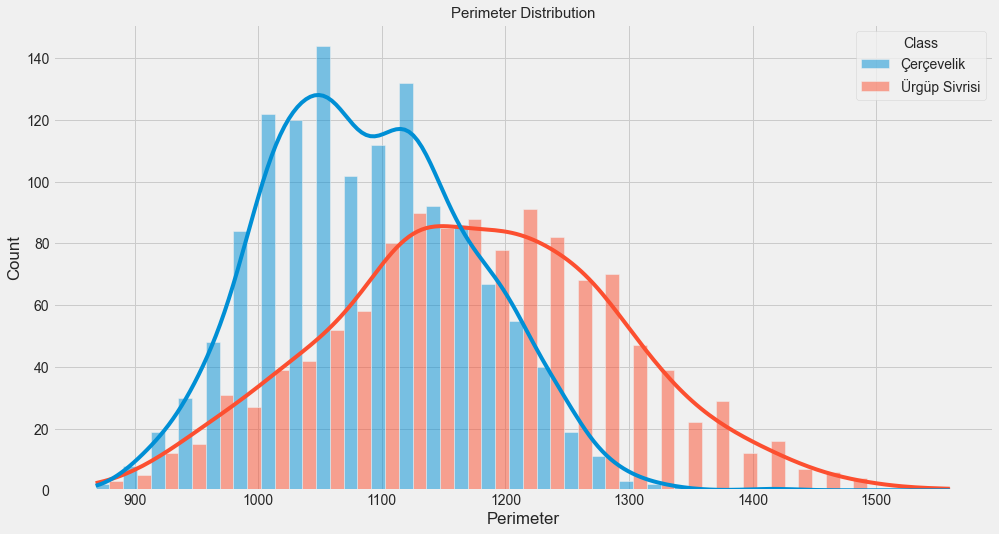

In [21]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Perimeter', kde=True, hue='Class', multiple='dodge')
plt.title("Perimeter Distribution", fontsize=15)
plt.show()

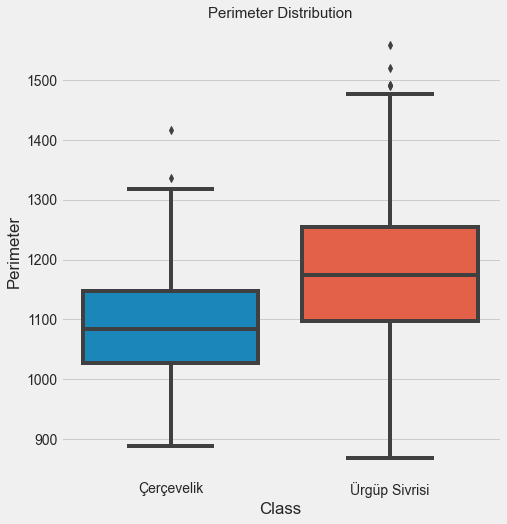

In [22]:
# plt.figure(figsize=(15,8))
sns.catplot(data=df, y='Perimeter', x='Class', kind='box', aspect=1, height=7)
plt.title("Perimeter Distribution", fontsize=15)
plt.show()

$ Observations :$
* Similar to the **area distribution**. Here, we can find a **clear difference** between both **class distributions** in terms of **Perimeter**. One more thing to notice is that **Çerçevelik** has **two peaks**, whereas **Ürgüp Sivrisi** has a **flat peak**.

* The **Box plot** shows that this time the **separation** is **much clear**.


---

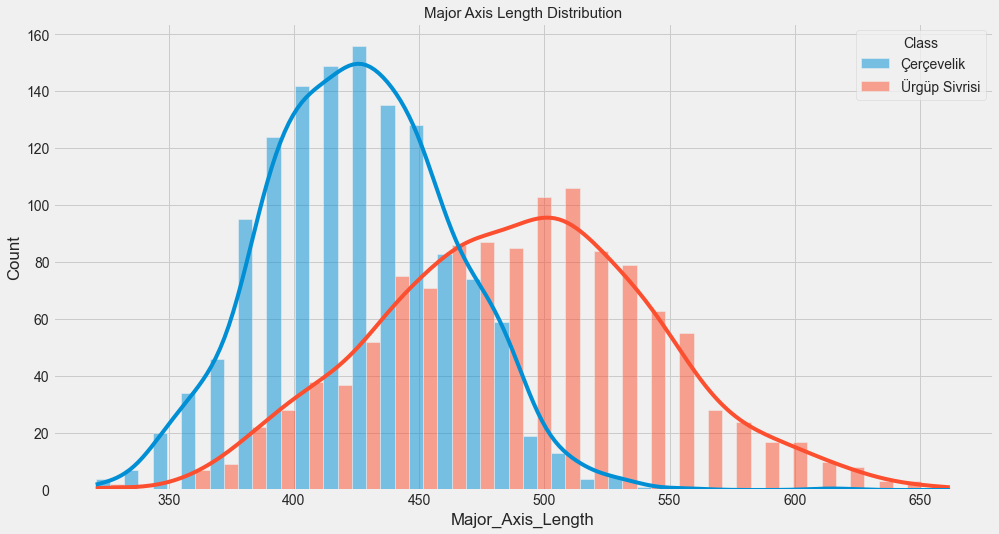

In [23]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Major_Axis_Length', kde=True, hue='Class', multiple='dodge')
plt.title("Major Axis Length Distribution", fontsize=15)
plt.show()

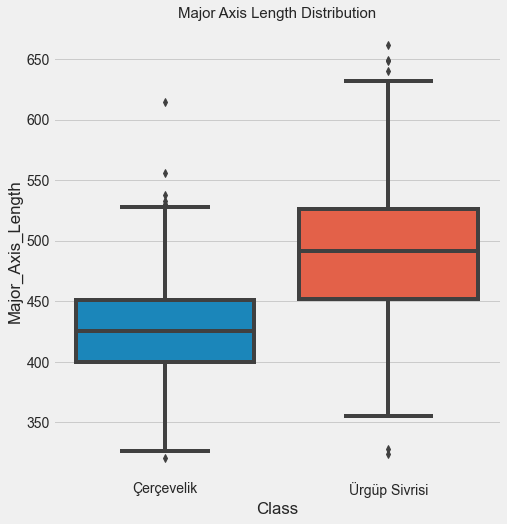

In [24]:
# plt.figure(figsize=(15,8))
sns.catplot(data=df, y='Major_Axis_Length', x='Class', kind='box', aspect=1, height=7)
plt.title("Major Axis Length Distribution", fontsize=15)
plt.show()

The results are still the same but the classes are getting **clearly seperated**.

---

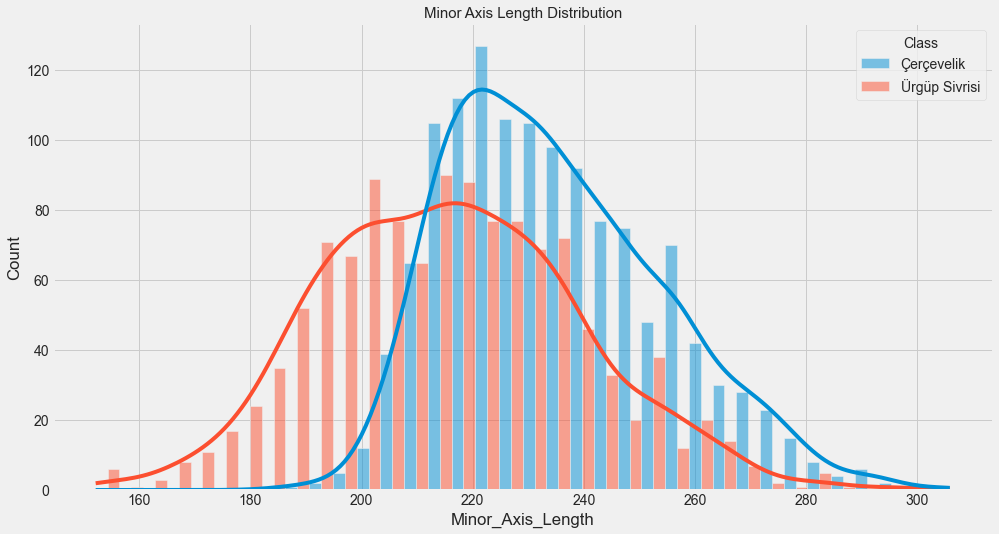

In [25]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Minor_Axis_Length', kde=True, hue='Class', multiple='dodge')
plt.title("Minor Axis Length Distribution", fontsize=15)
plt.show()

This time the story is flipped.

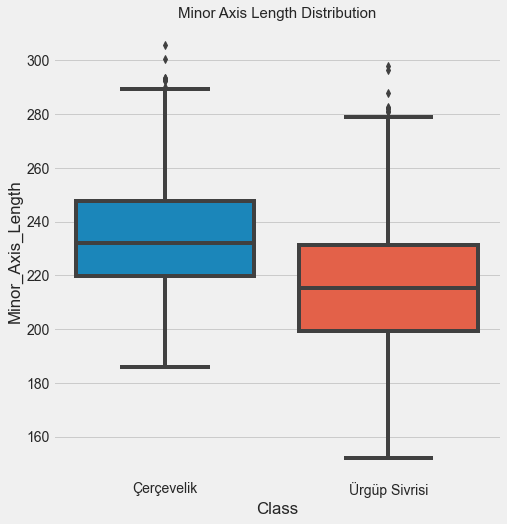

In [26]:
# plt.figure(figsize=(15,8))
sns.catplot(data=df, y='Minor_Axis_Length', x='Class', kind='box', aspect=1, height=7)
plt.title("Minor Axis Length Distribution", fontsize=15)
plt.show()

**Higher values** of **minor axis length** tends towards **Çerçevelik** class, whereas **lower values** tends towards **Ürgüp Sivrisi** class.

---

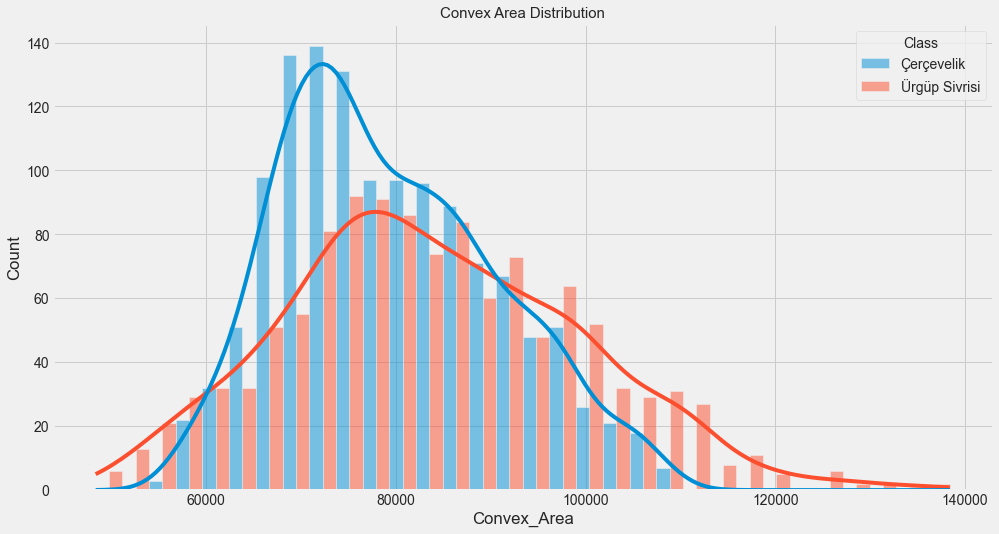

In [27]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Convex_Area', kde=True, hue='Class', multiple='dodge')
plt.title("Convex Area Distribution", fontsize=15)
plt.show()

This distribution looks **exactly the same** as the **Area distribution**.

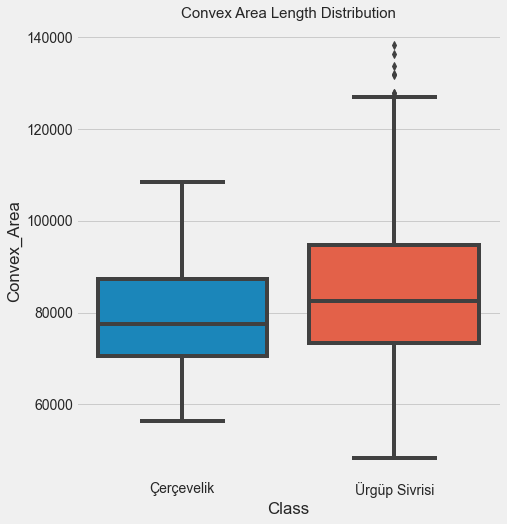

In [28]:
sns.catplot(data=df, y='Convex_Area', x='Class', kind='box', aspect=1, height=7)
plt.title("Convex Area Length Distribution", fontsize=15)
plt.show()

This time the **distributions** are **not well separated** because both **peaks** lies **close to each other**.

---

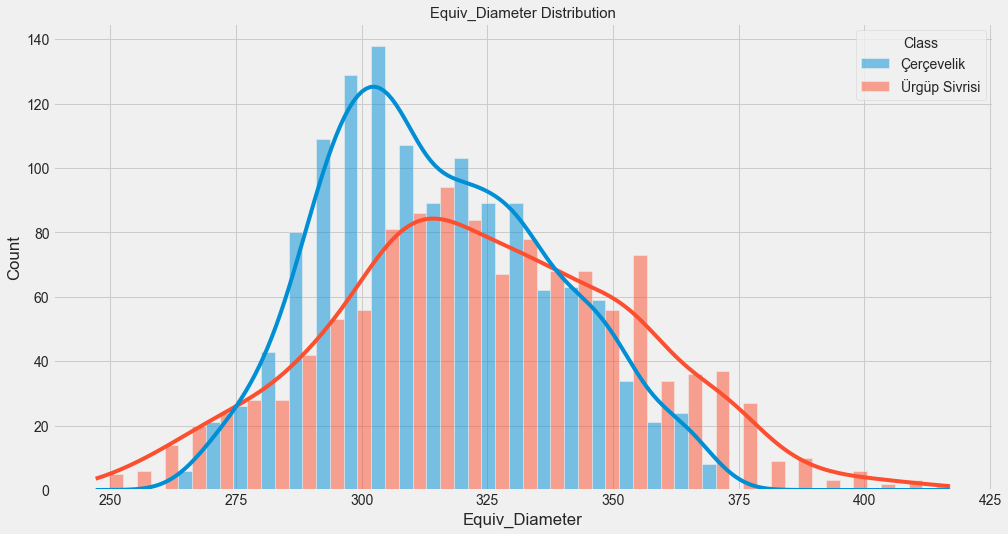

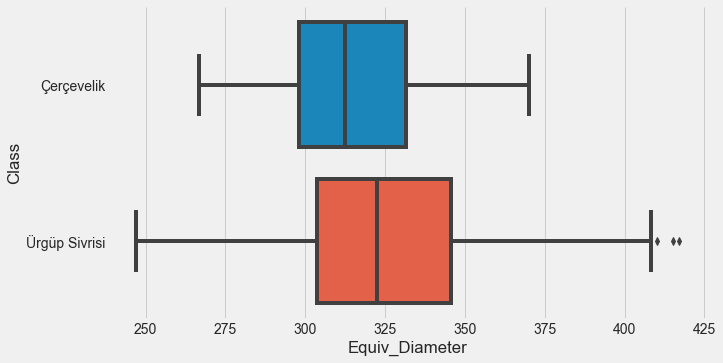

In [29]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Equiv_Diameter', kde=True, hue='Class', multiple='dodge')
plt.title("Equiv_Diameter Distribution", fontsize=15)
plt.show()

# Box Plot
sns.catplot(data=df, x='Equiv_Diameter', y='Class', kind='box', aspect=2, height=5)
plt.show()

Both **distributions** have **two smaller peaks**, the **second peak** is much **lower** than the **previous peak**. The peaks are **not well separated**.

---

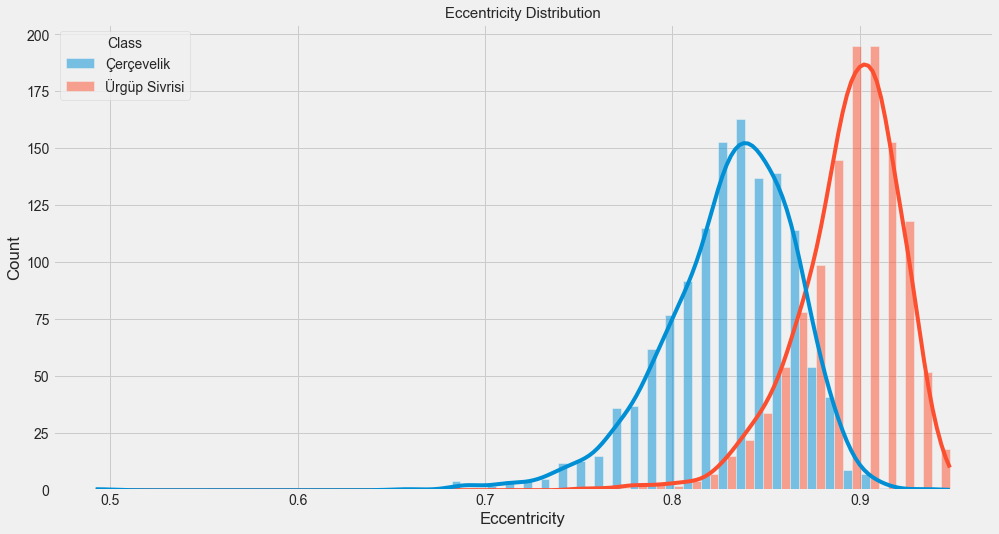

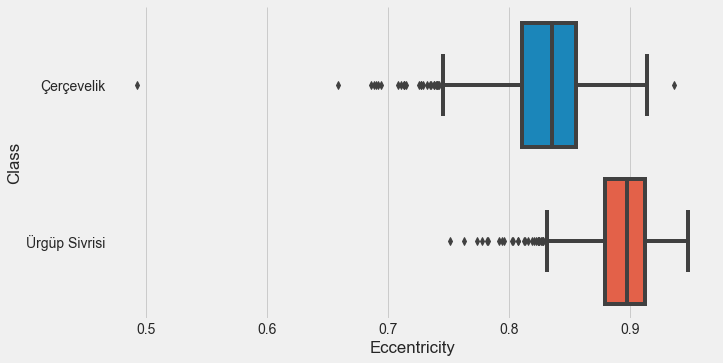

In [30]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Eccentricity', kde=True, hue='Class', multiple='dodge')
plt.title("Eccentricity Distribution", fontsize=15)
plt.show()

# Box Plot
sns.catplot(data=df, x='Eccentricity', y='Class', kind='box', aspect=2, height=5)
plt.show()

Both the **distributions** are **well separated** and in general, when **one distribution ends the other starts(in terms of peaks)**. 

---

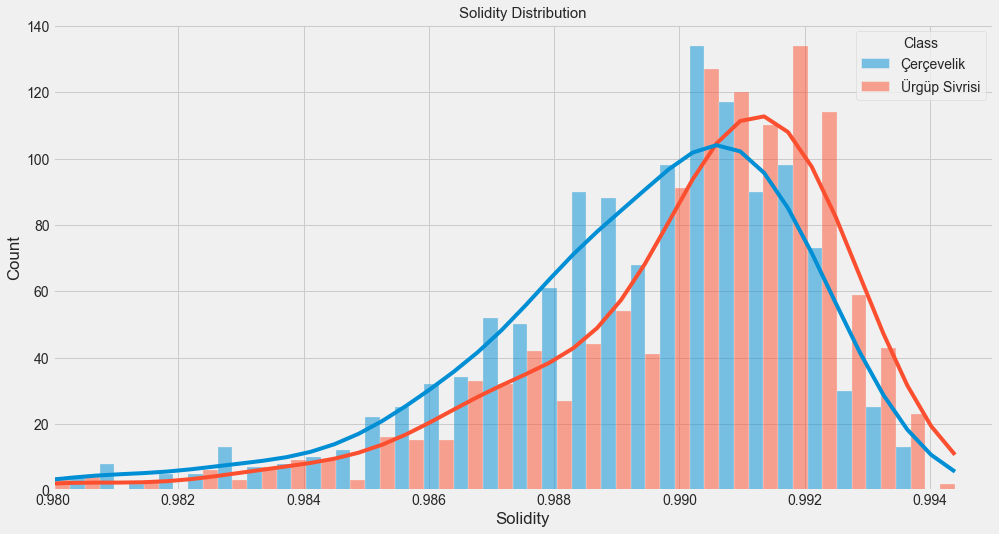

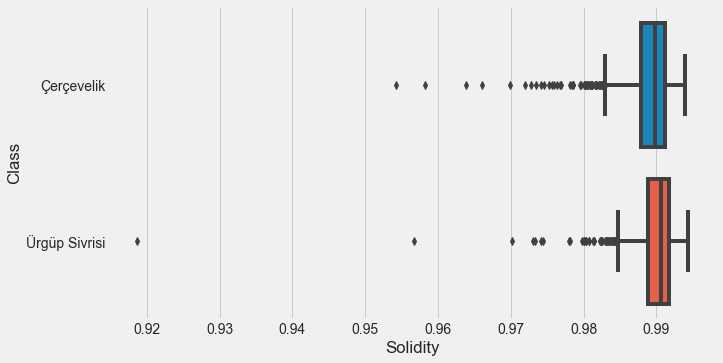

In [31]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Solidity', kde=True, hue='Class', multiple='dodge')
plt.title("Solidity Distribution", fontsize=15)
plt.xlim([0.98,0.995])
plt.show()

# Box Plot
sns.catplot(data=df, x='Solidity', y='Class', kind='box', aspect=2, height=5)
plt.show()

Both distributions have **peak at the same location they are not well separated.** This means the **solidity** of both class is **roughly the same**.

---

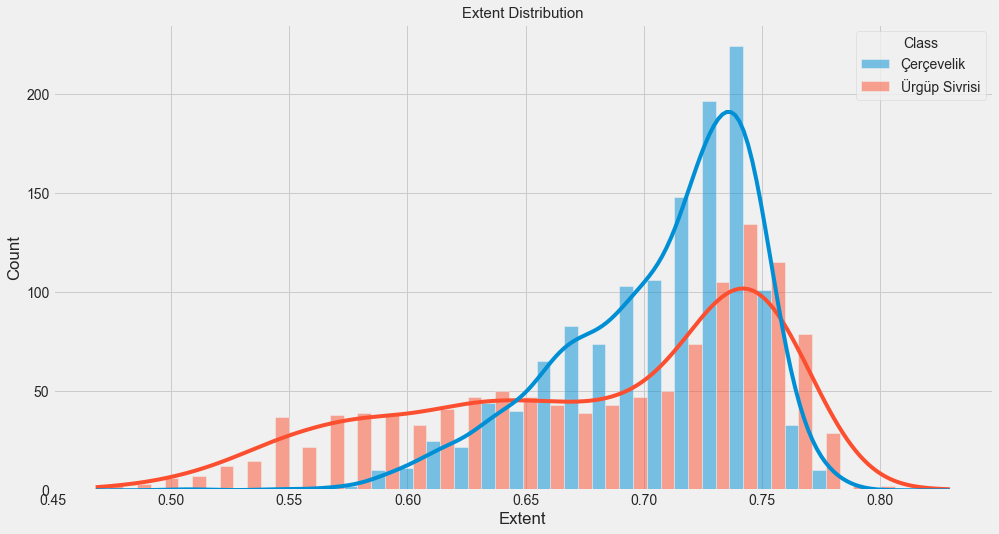

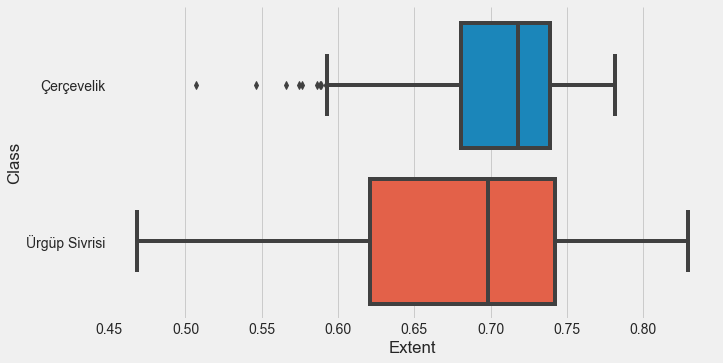

In [32]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Extent', kde=True, hue='Class', multiple='dodge')
plt.title("Extent Distribution", fontsize=15)
plt.show()

# Box Plot
sns.catplot(data=df, x='Extent', y='Class', kind='box', aspect=2, height=5)
plt.show()

The distribution is **quite interesting** because it first goes through a **flat plateau** for **Ürgüp Sivrisi** class, whereas shows a **straight increase** for **Çerçevelik** class but both **forms speak at roughly the same location**.

---

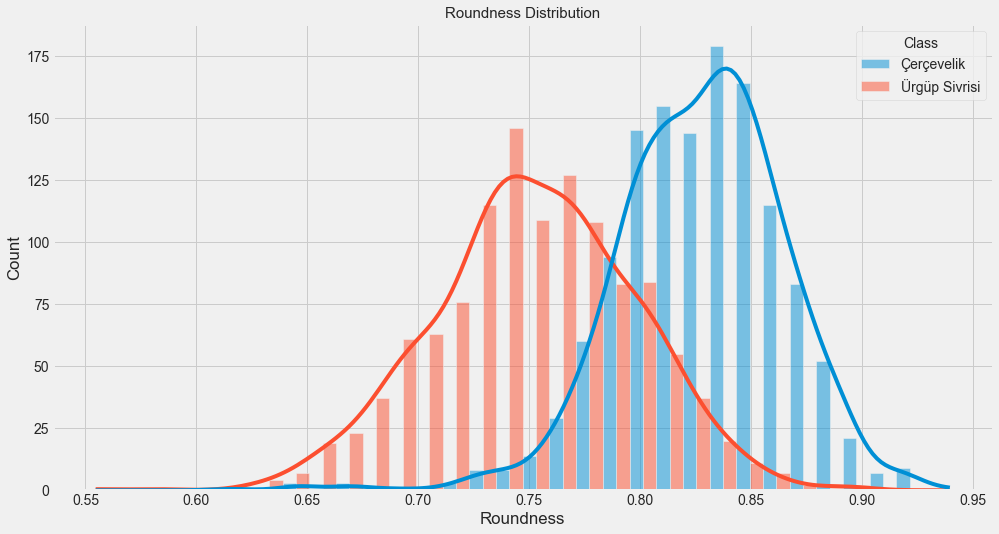

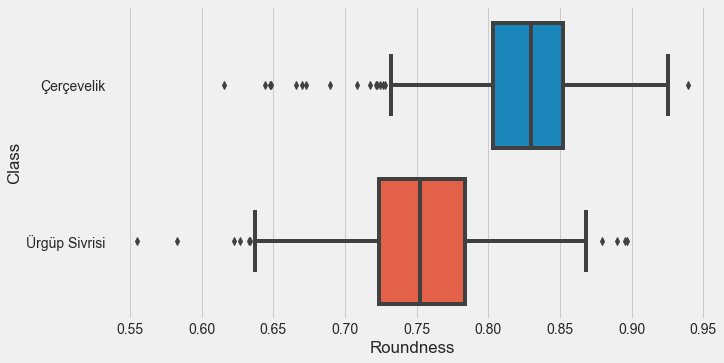

In [33]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Roundness', kde=True, hue='Class', multiple='dodge')
plt.title("Roundness Distribution", fontsize=15)
plt.show()

# Box Plot
sns.catplot(data=df, x='Roundness', y='Class', kind='box', aspect=2, height=5)
plt.show()

In terms of **roundness when the classes are well seperated**.


---

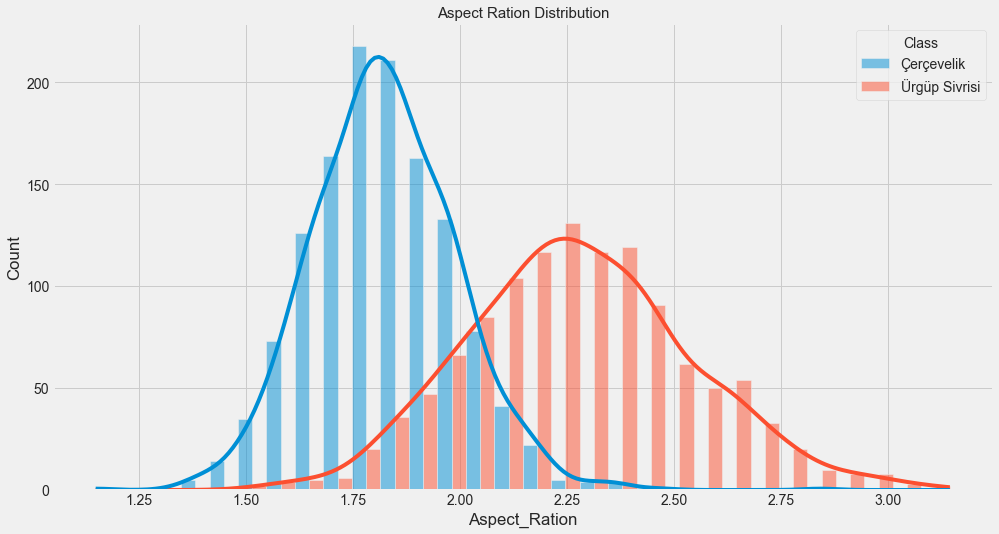

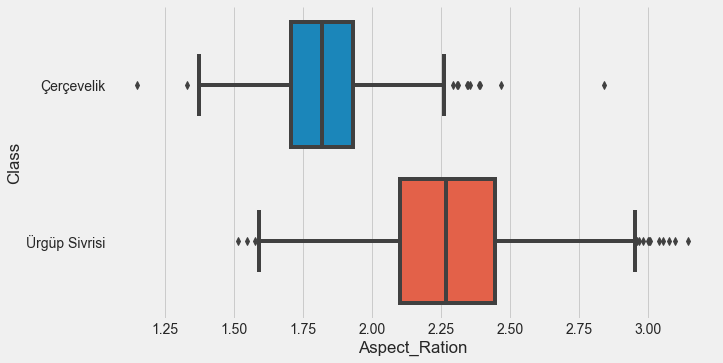

In [34]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Aspect_Ration', kde=True, hue='Class', multiple='dodge')
plt.title("Aspect Ration Distribution", fontsize=15)
plt.show()

# Box Plot
sns.catplot(data=df, x='Aspect_Ration', y='Class', kind='box', aspect=2, height=5)
plt.show()

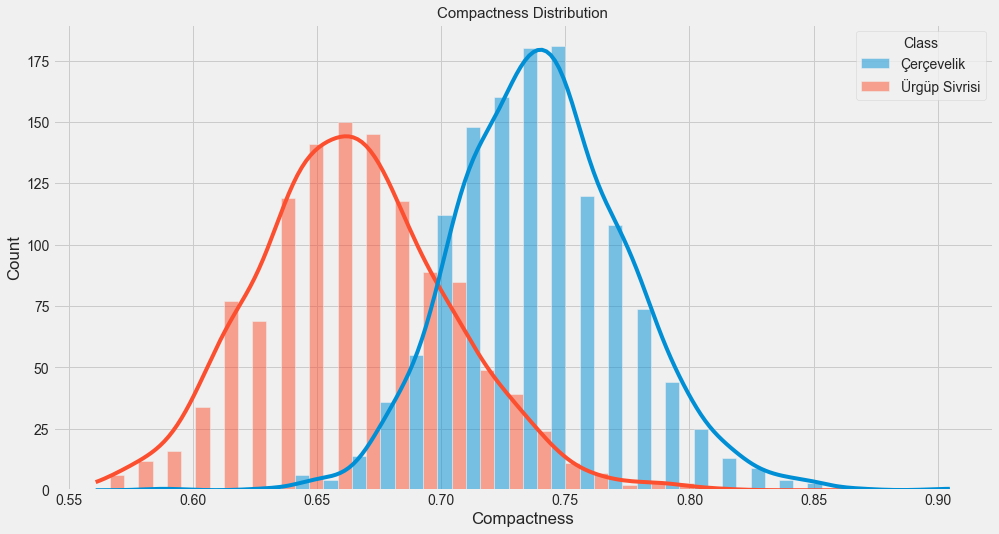

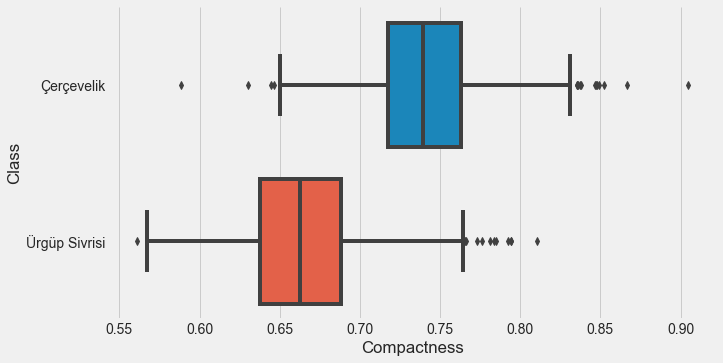

In [35]:
# Histogram
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='Compactness', kde=True, hue='Class', multiple='dodge')
plt.title("Compactness Distribution", fontsize=15)
plt.show()

# Box Plot
sns.catplot(data=df, x='Compactness', y='Class', kind='box', aspect=2, height=5)
plt.show()

Both distributions have a well separated class distribution.


---

let's have a look at the **correlation** among the **Features**

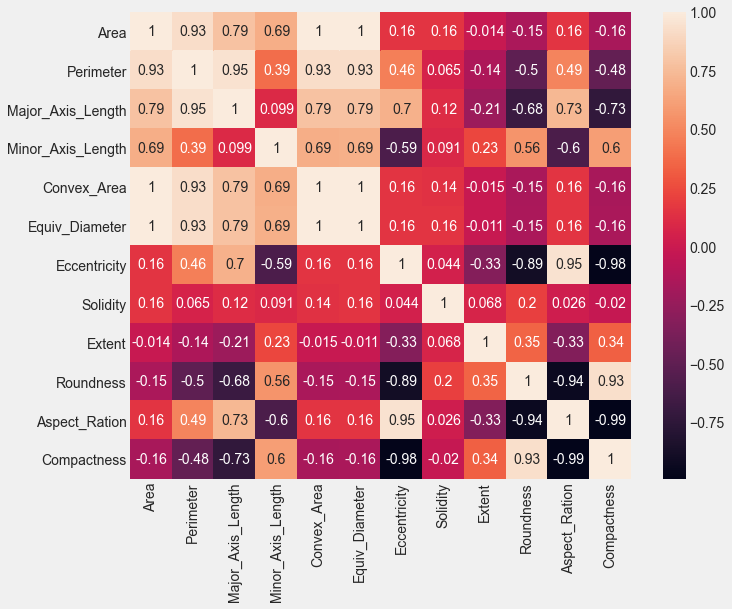

In [36]:
# Correlation
corr = df.corr()

# Figure
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)
plt.show()

Let's have a look at some of the **most strongest correlations**. many relations are **highly positive** like above **90**, so we will focus on them.

<Figure size 1080x1440 with 0 Axes>

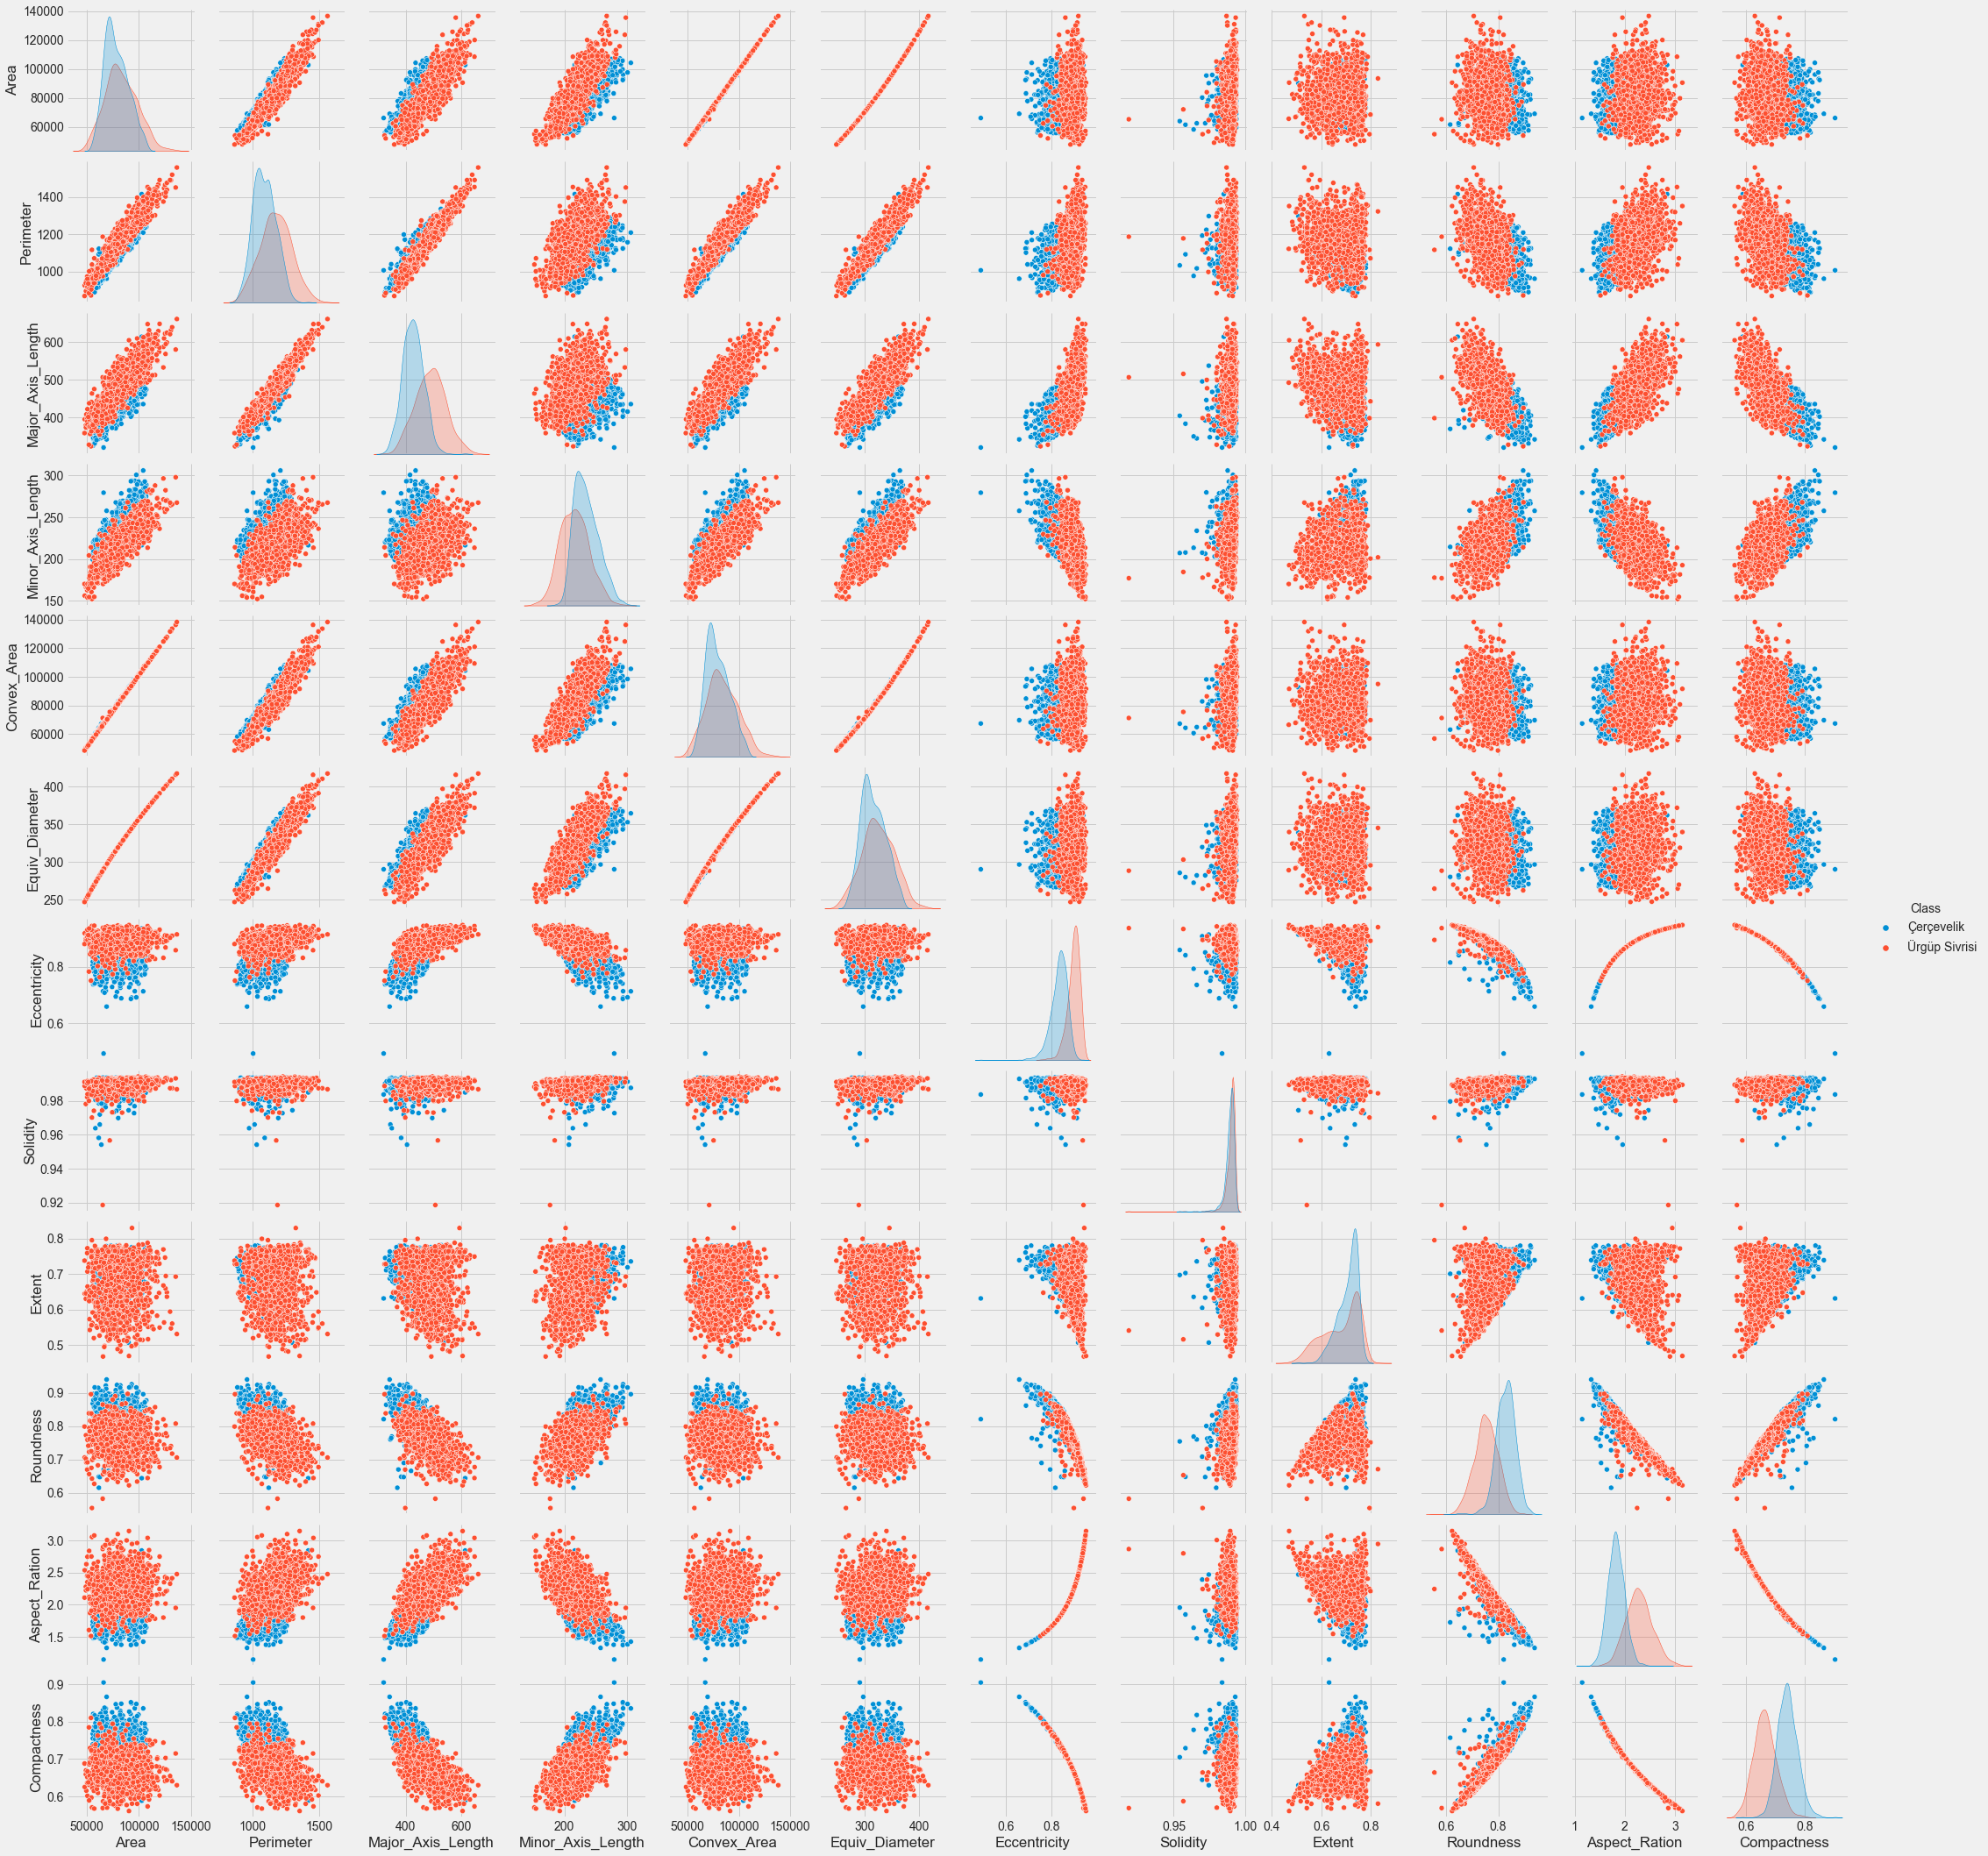

Wall time: 44.9 s


In [44]:
%%time
plt.figure(figsize=(15,20))
sns.pairplot(data=df,hue='Class')
plt.show()

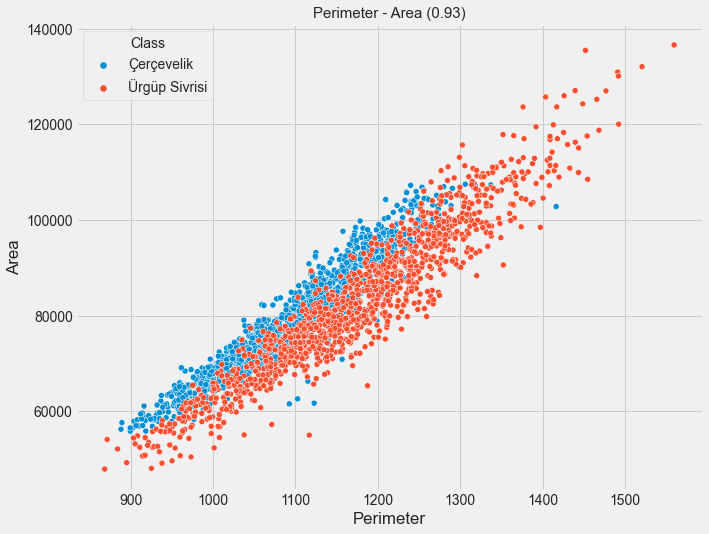

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Perimeter', y='Area', hue='Class')
plt.title("Perimeter - Area (0.93)", fontsize=15)
plt.show()

The **linear relationship** can easily be spotted but the classes are **not well separated**.

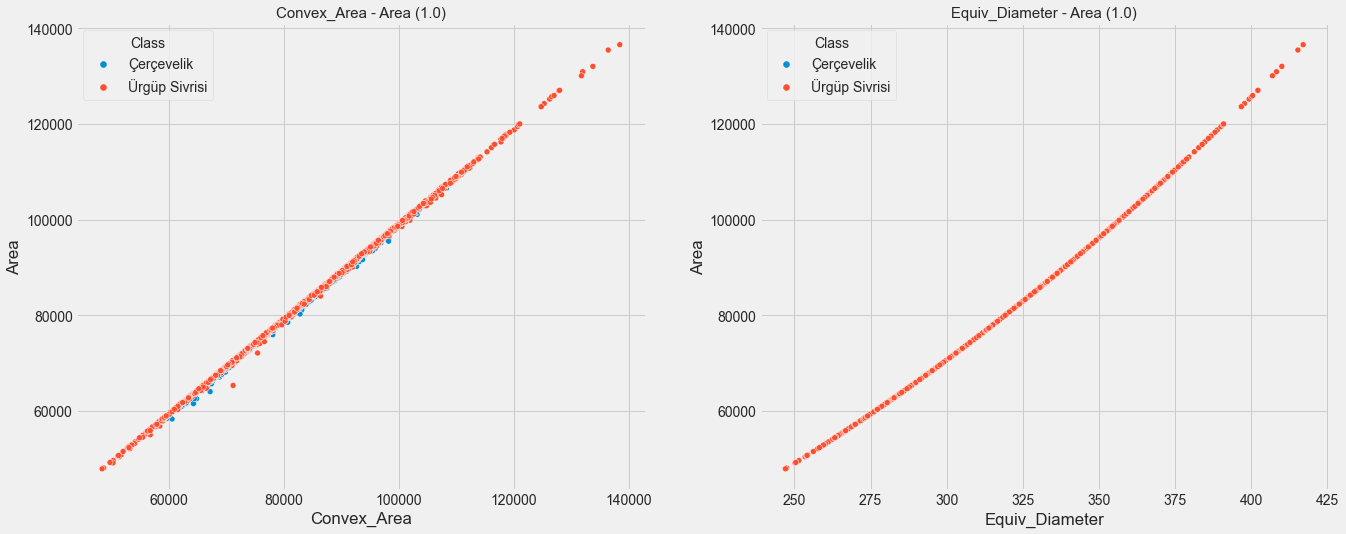

In [39]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Convex_Area', y='Area', hue='Class')
plt.title("Convex_Area - Area (1.0)", fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Equiv_Diameter', y='Area', hue='Class')
plt.title("Equiv_Diameter - Area (1.0)", fontsize=15)

plt.show()

Would the relations are **extremely linear**, but their is **no seperation for classes**.

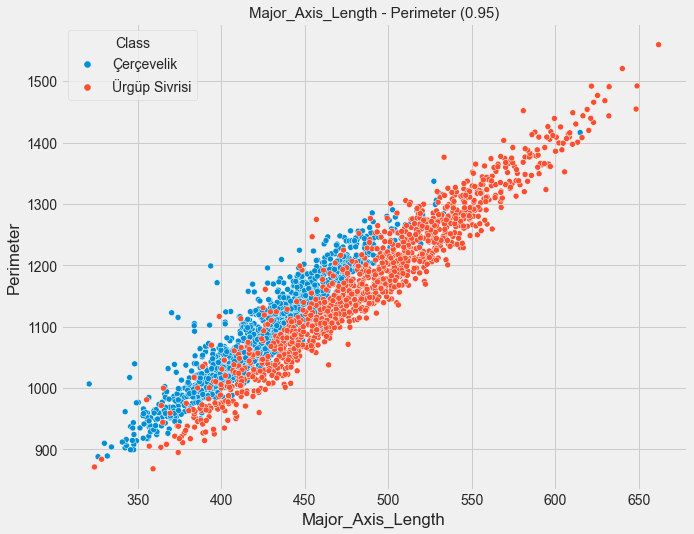

In [40]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Major_Axis_Length', y='Perimeter', hue='Class')
plt.title("Major_Axis_Length - Perimeter (0.95)", fontsize=15)
plt.show()

The **linear relationship** is **clear** and the classes are also **well distributed**.

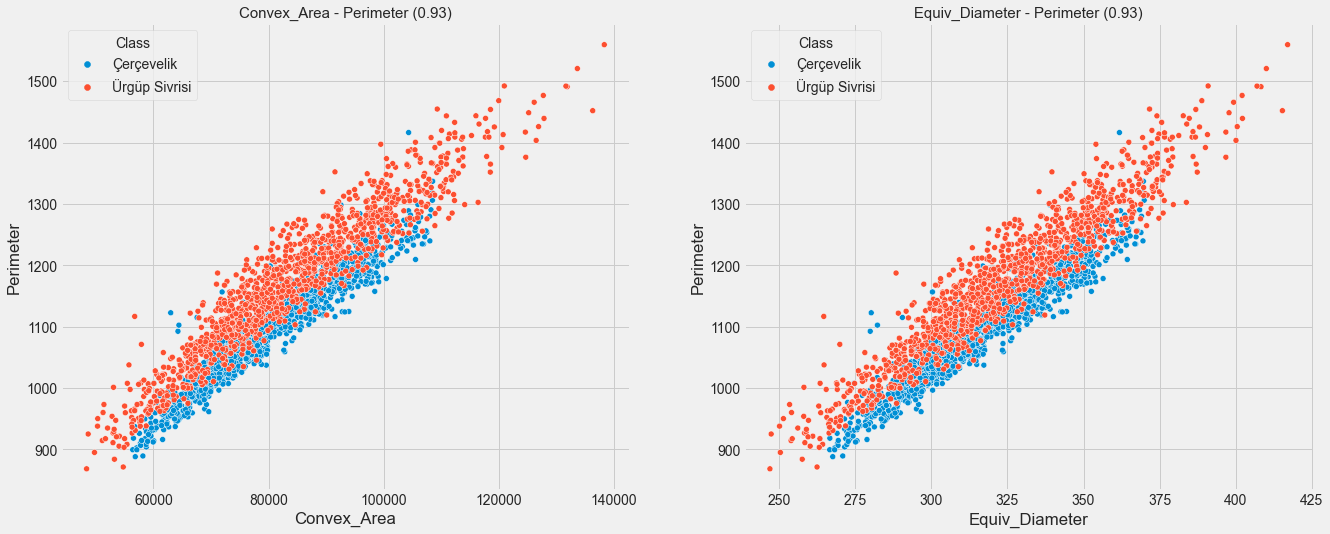

In [41]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
sns.scatterplot(data=df, x='Convex_Area', y='Perimeter', hue='Class')
plt.title("Convex_Area - Perimeter (0.93)", fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(data=df, x='Equiv_Diameter', y='Perimeter', hue='Class')
plt.title("Equiv_Diameter - Perimeter (0.93)", fontsize=15)

plt.show()

Both the **plots looks exactly the same**.

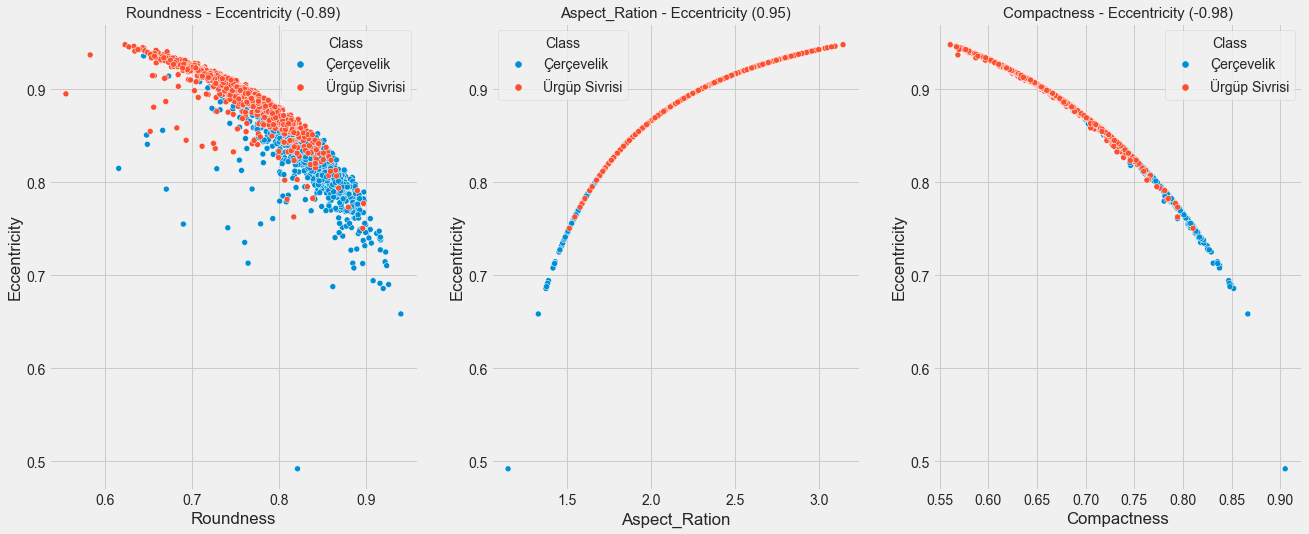

In [42]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x='Roundness', y='Eccentricity', hue='Class')
plt.title("Roundness - Eccentricity (-0.89)", fontsize=15)

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='Aspect_Ration', y='Eccentricity', hue='Class')
plt.title("Aspect_Ration - Eccentricity (0.95)", fontsize=15)

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='Compactness', y='Eccentricity', hue='Class')
plt.title("Compactness - Eccentricity (-0.98)", fontsize=15)

plt.show()

All these relations are **linear** but they are **more shifted toward quadratic relations**.

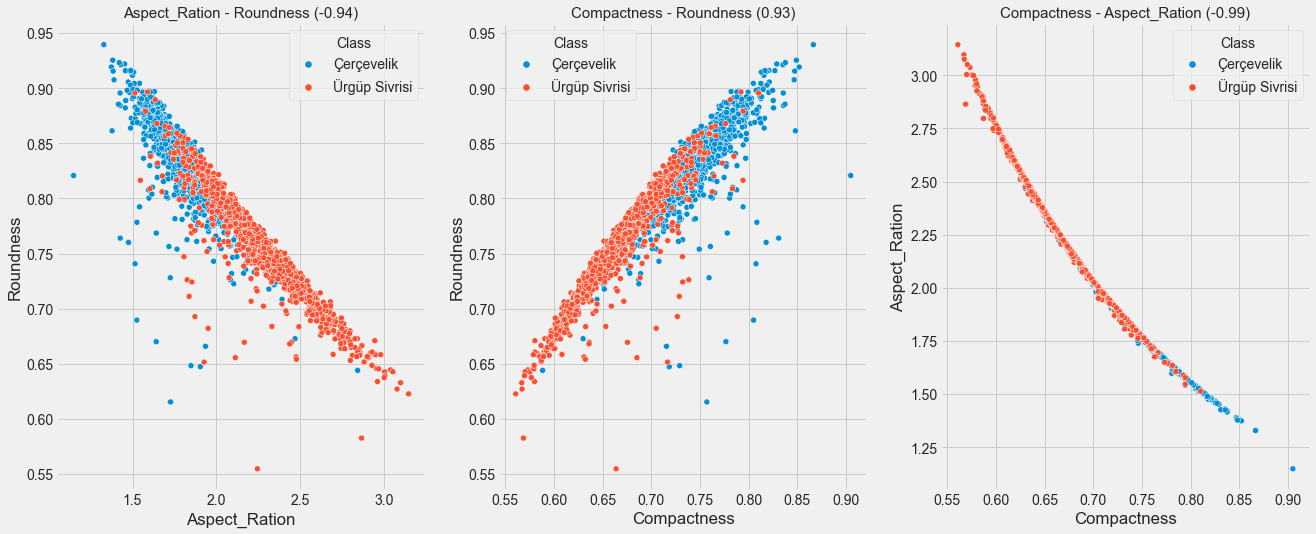

In [43]:
plt.figure(figsize=(20,8))

plt.subplot(1,3,1)
sns.scatterplot(data=df, x='Aspect_Ration', y='Roundness', hue='Class')
plt.title("Aspect_Ration - Roundness (-0.94)", fontsize=15)

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='Compactness', y='Roundness', hue='Class')
plt.title("Compactness - Roundness (0.93)", fontsize=15)

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='Compactness', y='Aspect_Ration', hue='Class')
plt.title("Compactness - Aspect_Ration (-0.99)", fontsize=15)

plt.show()

# **Data Preprocessing**

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


Other than **Class** all the **data points** are **numerical** and there are no **Null Values**. That's great, now we can focus on **Model Building**. Let's turn the **class to numbers**.

In [48]:
class_mapping = {}
reverse_class_mapping = {}
for i, name in enumerate(class_names.unique()):
    class_mapping[name] = i
    reverse_class_mapping[i] = name

In [49]:
df['Class'] = df['Class'].map(class_mapping)

In [50]:
df.head()

Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0  56276    888.242           326.1485           220.2388        56831   
1  76631   1068.146           417.1932           234.2289        77280   
2  71623   1082.987           435.8328           211.0457        72663   
3  66458    992.051           381.5638           222.5322        67118   
4  66107    998.146           383.8883           220.4545        67117   

   Equiv_Diameter  Eccentricity  Solidity  Extent  Roundness  Aspect_Ration  \
0        267.6805        0.7376    0.9902  0.7453     0.8963         1.4809   
1        312.3614        0.8275    0.9916  0.7151     0.8440         1.7811   
2        301.9822        0.8749    0.9857  0.7400     0.7674         2.0651   
3        290.8899        0.8123    0.9902  0.7396     0.8486         1.7146   
4        290.1207        0.8187    0.9850  0.6752     0.8338         1.7413   

   Compactness  Class  
0       0.8207      0  
1       0.7487      0  
2       0.6929      0  
3       0.7624      0  
4       0.7557      0

# **Data Splitting**

In [51]:
# Splitted Data
y_full = df.pop('Class').to_numpy()
X_full = df.to_numpy()

# Scaled Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_full)

# Data Spliting
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y_full, test_size=0.2)

# **Models**

In [52]:
# Model
rfc = RandomForestClassifier(max_depth=10, max_features=10, random_state=656)
rfc.fit(X_train, y_train)

# Prediction
pred = rfc.predict(X_valid)

# Metrics
report = classification_report(y_valid, pred)
cm = confusion_matrix(y_valid, pred)
rfc_f1 = f1_score(y_valid, pred)
rfc_Precision = precision_score(y_valid, pred)
rfc_Recall = recall_score(y_valid, pred)

# Show
print(report)
print('Confusion Matrix : \n{}\n'.format(cm))
print("F1 Score         : {:.4}%\n".format(rfc_f1*100))
print("Precision Score  : {:.4}%\n".format(rfc_Precision*100))
print("Recall Score     : {:.4}%".format(rfc_Recall*100))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       269
           1       0.89      0.87      0.88       231

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

Confusion Matrix : 
[[245  24]
 [ 30 201]]

F1 Score         : 88.16%

Precision Score  : 89.33%

Recall Score     : 87.01%


This was the best model out of :

* **Support Vector Classifier** (kernel='rbf')
* **Support Vector Classifier** (kernel='poly')
* **Polynomial LogisticRegression**
* **SGDClassifier**
* **Voting Classifier** (mode='soft')
* **LogisticRegression**
* **GridSearch** (on all)

Other will also achieve **simillar peformance** on **classification report** but this was just a **little better**. The runner up was **LogisticRegression**.

---
The maximum performance I was able to obtain had a **F1 Score of 90%**.

In [53]:
# Model
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Prediction
pred = lr.predict(X_valid)

# Metrics
report = classification_report(y_valid, pred)

cm = confusion_matrix(y_valid, pred)
lr_f1 = f1_score(y_valid, pred)
lr_Precision = precision_score(y_valid, pred)
lr_Recall = recall_score(y_valid, pred)

# Show
print(report)
print('Confusion Matrix : \n{}\n'.format(cm))
print("F1 Score         : {:.4}%\n".format(lr_f1*100))
print("Precision Score  : {:.4}%\n".format(lr_Precision*100))
print("Recall Score     : {:.4}%".format(lr_Recall*100))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       269
           1       0.90      0.86      0.88       231

    accuracy                           0.89       500
   macro avg       0.90      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

Confusion Matrix : 
[[248  21]
 [ 32 199]]

F1 Score         : 88.25%

Precision Score  : 90.45%

Recall Score     : 86.15%


In [59]:
# Model
model_path = pretrained_model+'\\Dense-01-V1.h5'
model = load_model(model_path)

# Prediction
pred = np.round(model.predict(X_valid))

# Metrics
report = classification_report(y_valid, pred)
cm = confusion_matrix(y_valid, pred)
model_01_v1_f1 = f1_score(y_valid, pred)
model_01_v1_Precision = precision_score(y_valid, pred)
model_01_v1_Recall = recall_score(y_valid, pred)

# Show
print(report)
print('Confusion Matrix : \n{}\n'.format(cm))
print("F1 Score         : {:.4}%\n".format(model_01_v1_f1*100))
print("Precision Score  : {:.4}%\n".format(model_01_v1_Precision*100))
print("Recall Score     : {:.4}%".format(model_01_v1_Recall*100))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       269
           1       0.92      0.87      0.89       231

    accuracy                           0.90       500
   macro avg       0.90      0.90      0.90       500
weighted avg       0.90      0.90      0.90       500

Confusion Matrix : 
[[251  18]
 [ 31 200]]

F1 Score         : 89.09%

Precision Score  : 91.74%

Recall Score     : 86.58%


In [60]:
# Model
model_path = pretrained_model+'\\Dense-01-V2.h5'
model = load_model(model_path)

# Prediction
pred = np.round(model.predict(X_valid))

# Metrics
report = classification_report(y_valid, pred)
cm = confusion_matrix(y_valid, pred)
model_01_v2_f1 = f1_score(y_valid, pred)
model_01_v2_Precision = precision_score(y_valid, pred)
model_01_v2_Recall = recall_score(y_valid, pred)

# Show
print(report)
print('Confusion Matrix : \n{}\n'.format(cm))
print("F1 Score         : {:.4}%\n".format(model_01_v2_f1*100))
print("Precision Score  : {:.4}%\n".format(model_01_v2_Precision*100))
print("Recall Score     : {:.4}%".format(model_01_v2_Recall*100))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       269
           1       0.92      0.88      0.90       231

    accuracy                           0.91       500
   macro avg       0.91      0.91      0.91       500
weighted avg       0.91      0.91      0.91       500

Confusion Matrix : 
[[252  17]
 [ 28 203]]

F1 Score         : 90.02%

Precision Score  : 92.27%

Recall Score     : 87.88%


In [63]:
# Model
model_path = pretrained_model+'\\Dense-02.h5'
model = load_model(model_path)

# Prediction
pred = np.round(model.predict(X_valid))

# Metrics
report = classification_report(y_valid, pred)
cm = confusion_matrix(y_valid, pred)
model_02_f1 = f1_score(y_valid, pred)
model_02_Precision = precision_score(y_valid, pred)
model_02_Recall = recall_score(y_valid, pred)

# Show
print(report)
print('Confusion Matrix : \n{}\n'.format(cm))
print("F1 Score         : {:.4}%\n".format(model_02_f1*100))
print("Precision Score  : {:.4}%\n".format(model_02_Precision*100))
print("Recall Score     : {:.4}%".format(model_02_Recall*100))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       269
           1       0.88      0.88      0.88       231

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

Confusion Matrix : 
[[242  27]
 [ 27 204]]

F1 Score         : 88.31%

Precision Score  : 88.31%

Recall Score     : 88.31%


In [61]:
# Model
model_path = pretrained_model+'\\Dense-03.h5'
model = load_model(model_path)

# Prediction
pred = np.round(model.predict(X_valid))

# Metrics
report = classification_report(y_valid, pred)
cm = confusion_matrix(y_valid, pred)
model_03_f1 = f1_score(y_valid, pred)
model_03_Precision = precision_score(y_valid, pred)
model_03_Recall = recall_score(y_valid, pred)

# Show 
print(report)
print('Confusion Matrix : \n{}\n'.format(cm))
print("F1 Score         : {:.4}%\n".format(model_03_f1*100))
print("Precision Score  : {:.4}%\n".format(model_03_Precision*100))
print("Recall Score     : {:.4}%".format(model_03_Recall*100))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       269
           1       0.88      0.89      0.88       231

    accuracy                           0.89       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.89      0.89      0.89       500

Confusion Matrix : 
[[241  28]
 [ 26 205]]

F1 Score         : 88.36%

Precision Score  : 87.98%

Recall Score     : 88.74%


Let's compare all models for better understanding.

# **Model Comparision**

In [64]:
names = ['RFC','LR','Dense-01-V1', 'Dense-01-V2', 'Dense-02', 'Dense-03']
f1_scores = [rfc_f1, lr_f1, model_01_v1_f1, model_01_v2_f1, model_02_f1, model_03_f1]
precision_scores = [rfc_Precision, lr_Precision, model_01_v1_Precision, model_01_v2_Precision, model_02_Precision, model_03_Precision]
recall_scores = [rfc_Recall, lr_Recall, model_01_v1_Recall, model_01_v2_Recall, model_02_Recall, model_03_Recall]

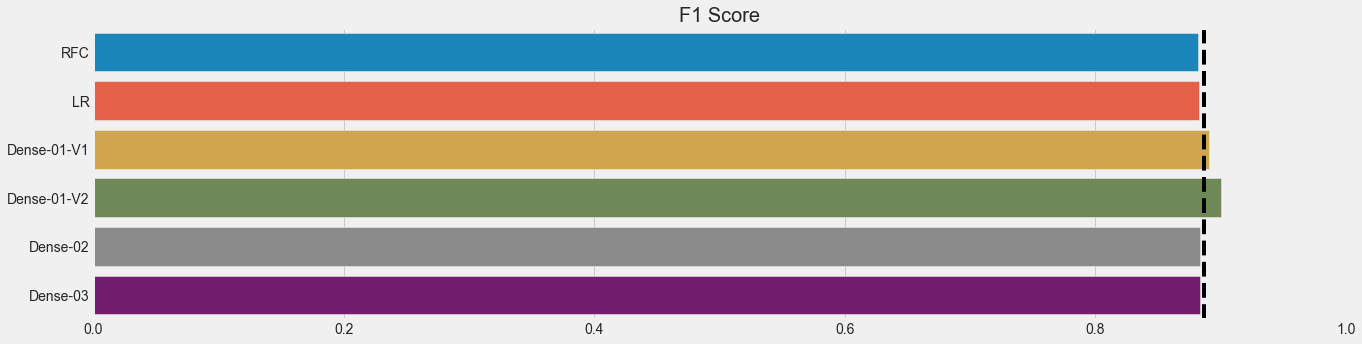

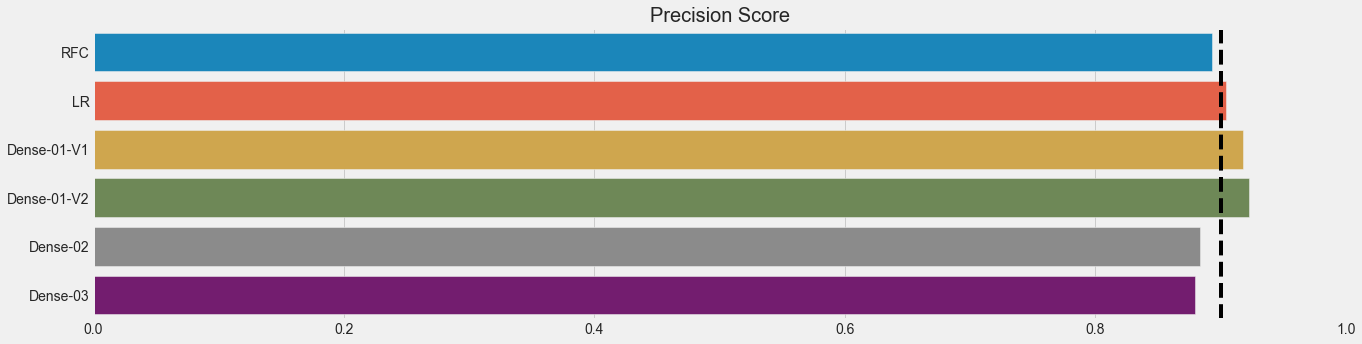

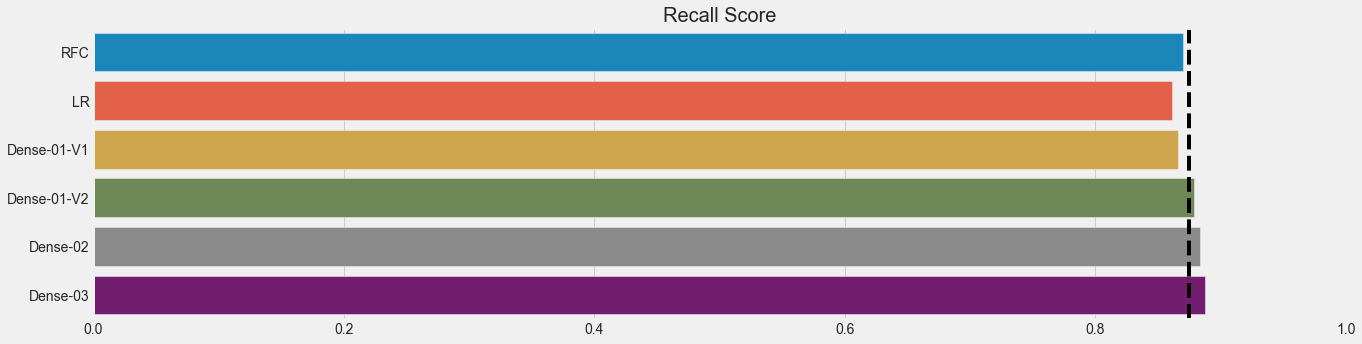

In [65]:
# Model Comaprision
plt.figure(figsize=(20,5))
plt.title("F1 Score", fontsize=20)
sns.barplot(y=names, x=f1_scores)
plt.axvline(np.mean(f1_scores), color='k', linestyle='--')
plt.xlim([0,1])
plt.show()

plt.figure(figsize=(20,5))
plt.title("Precision Score", fontsize=20)
sns.barplot(y=names, x=precision_scores)
plt.axvline(np.mean(precision_scores), color='k', linestyle='--')
plt.xlim([0,1])
plt.show()

plt.figure(figsize=(20,5))
plt.title("Recall Score", fontsize=20)
sns.barplot(y=names, x=recall_scores)
plt.axvline(np.mean(recall_scores), color='k', linestyle='--')
plt.xlim([0,1])
plt.show()

The **only model** that **stands above the mean line** in all three plots is the **Dense-01-V2 or Dense-03**. This model is exactly the **same in architecture** as **Dense-01-V1** but it is trained for **more epochs**.

In [66]:
model_path = pretrained_model+'\\Dense-01-V2.h5'
model = load_model(model_path)
print("Model-01-V2 Architecture :")
model.summary()

Model-01-V2 Architecture :
Model: "Dense-01"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                156       
                                                                 
 dense_1 (Dense)             (None, 100)               1300      
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 11,657
Trainable params: 11,657
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_path = pretrained_model+'\\Dense-03.h5'
model = load_model(model_path)
print("Model-03 Architecture :")
model.summary()

Model-03 Architecture :
Model: "Dense-03"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 100)               1300      
                                                                 
 dense_10 (Dense)            (None, 100)               10100     
                                                                 
 dense_11 (Dense)            (None, 100)               10100     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 21,757
Trainable params: 21,757
Non-trainable params: 0
_________________________________________________________________


As you can see that the **model architecture is very simple**, yet **very effective**. The second best model is **Random Forest Classifier** followed by the **Dense-03**. This shows that just **training the model for long enough** can **improve model's performance**.

---
$Note :$ Depending on the run the values may change. Despite of that the top 3 models will be "Dense-01-V1", "Dense-01-V2", "Dense-03".


**Thanks!!, Let me know your suggestions in the comments**
